## 👨🏻‍💻Практика - Диагностика заболеваний
Классификация пациентов на больных и здоровых на основе результатов медицинских анализов.
Убедитесь, что в ваших данных есть бинарная целевая переменная (0/1) для диагноза.

✔️**Решение:**

### ✔ Импорт библиотек: 
Импортируем все необходимые библиотеки, включая matplotlib.pyplot для построения графиков.

In [1]:
# импортируем все необходимые библиотеки для работы с данными
import pandas as pd
# для разделения данных
from sklearn.model_selection import train_test_split
# для создания модели
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# для оценки качества

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
# графики
import matplotlib.pyplot as plt

### ✔ Загрузка и подготовка данных: 
Загружаем данные, определяем признаки и целевую переменную, делим данные на обучающую и тестовую выборки.

In [2]:
# Загружаем данные 
data = pd.read_csv(
    r'C:\Users\79181\n.brykovskaya\module_2\4ML\files\diabet.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### ✔ Определение признаков и целевой переменной: 
Указываем, какие столбцы в данных являются признаками (X) и какой столбец - целевой переменной (y).  
Предположим, что 'Outcome' - диагноз (0 - здоров, 1 - болен), а остальные столбцы - признаки

In [3]:
# Определяем независимые переменные (признаки) и зависимую переменную (целевая)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

### ✔ Разделение данных: 
Разделяем данные на обучающую и тестовую выборки в соотношении 70/30. 

random_state используется для воспроизводимости результатов.

In [4]:
# Разделяем данные на обучающую (70%) и тестовую (30%) выборки
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.3, random_state=0))

### ✔Создание и обучение модели: 
Создаем экземпляр LogisticRegression и обучаем его на данных.

In [5]:
# Создаем модель логистической регрессии
model = LogisticRegression()
# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

C:\Users\79181\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### ✔Предсказания:
Получаем предсказания для тестовой выборки.

In [6]:
# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

### ✔Оценка качества:
    - Вычисляем точность, полноту, F-меру и выводим их.
    - Строим и выводим матрицу ошибок.

In [7]:
# Оцениваем качество модели
print("✔️Точность:👉 ", accuracy_score(y_test, y_pred))
print("✔️Precision:👉 ", precision_score(y_test, y_pred))
print("✔️Полнота:👉 ", recall_score(y_test, y_pred))
print("✔️F-мера:👉 ", f1_score(y_test, y_pred))

# Строим матрицу ошибок
print("\n✔️Матрица ошибок:👉\n {}".format(
confusion_matrix(y_test, y_pred)))

✔️Точность:👉  0.7792207792207793
✔️Precision:👉  0.7090909090909091
✔️Полнота:👉  0.527027027027027
✔️F-мера:👉  0.6046511627906976

✔️Матрица ошибок:👉
 [[141  16]
 [ 35  39]]


### ✔Строим ROC-кривую и вычисляем AUC     

In [8]:
# Вычисляем вероятности для класса 1 (`y_probs`).
y_probs = model.predict_proba(X_test)[:, 1]  
# Используем roc_curve для получения значений FPR, TPR и порогов.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Вычисляем AUC с помощью `auc`.
roc_auc = auc(fpr, tpr)

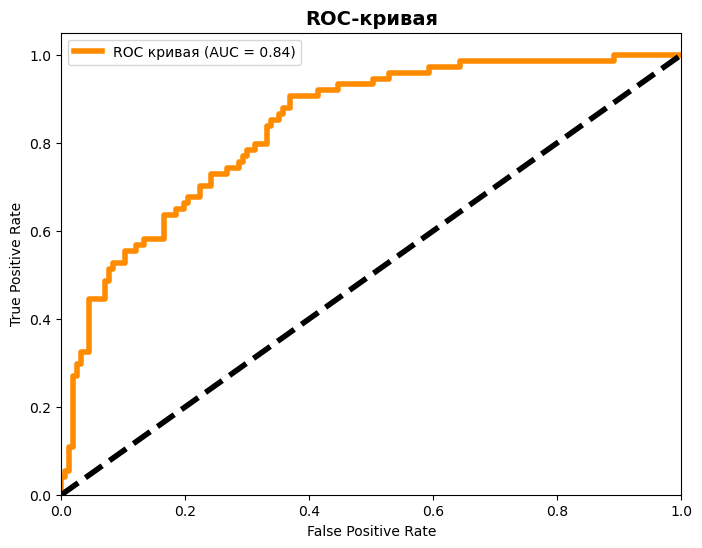

In [9]:
# Строим ROC-кривую с помощью matplotlib.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 
         color='darkorange', 
         lw=4, 
         label=f'ROC кривая (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=4, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая', fontsize=14, fontweight='bold')
plt.legend(loc="upper left")

plt.show()